### H(0) : There is no difference in the distribution of emotions between wave3 and wave4 of COVID-19
### H(1) : There is a difference in the distribution of emotions between wave3 and wave4 of COVID-19

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


wave3 = pd.read_csv('../Dataset/wave3.csv')
wave4 = pd.read_csv('../Dataset/wave4.csv')


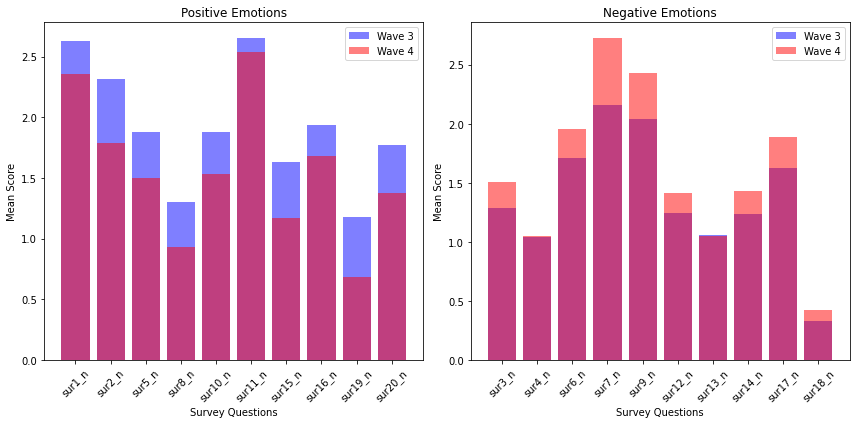

In [9]:
# Subset the data for Wave 3 and Wave 4
wave3_positive_emotions = wave3[['sur1_n', 'sur2_n', 'sur5_n', 'sur8_n',
                                 'sur10_n', 'sur11_n', 'sur15_n', 'sur16_n', 'sur19_n', 'sur20_n']]
wave4_positive_emotions = wave4[['sur1_n', 'sur2_n', 'sur5_n', 'sur8_n',
                                 'sur10_n', 'sur11_n', 'sur15_n', 'sur16_n', 'sur19_n', 'sur20_n']]

wave3_negative_emotions = wave3[['sur3_n', 'sur4_n', 'sur6_n', 'sur7_n',
                                 'sur9_n', 'sur12_n', 'sur13_n', 'sur14_n', 'sur17_n', 'sur18_n']]
wave4_negative_emotions = wave4[['sur3_n', 'sur4_n', 'sur6_n', 'sur7_n',
                                 'sur9_n', 'sur12_n', 'sur13_n', 'sur14_n', 'sur17_n', 'sur18_n']]

# Calculate the mean or median score for each survey question in Wave 3 and Wave 4
wave3_positive_mean = wave3_positive_emotions.mean()
wave4_positive_mean = wave4_positive_emotions.mean()

wave3_negative_mean = wave3_negative_emotions.mean()
wave4_negative_mean = wave4_negative_emotions.mean()

# Optionally, visualize the results
plt.figure(figsize=(12, 6))

# Positive Emotions
plt.subplot(1, 2, 1)
plt.bar(wave3_positive_mean.index, wave3_positive_mean.values,
        color='blue', alpha=0.5, label='Wave 3')
plt.bar(wave4_positive_mean.index, wave4_positive_mean.values,
        color='red', alpha=0.5, label='Wave 4')
plt.title('Positive Emotions')
plt.xlabel('Survey Questions')
plt.ylabel('Mean Score')
plt.xticks(rotation=45)
plt.legend()

# Negative Emotions
plt.subplot(1, 2, 2)
plt.bar(wave3_negative_mean.index, wave3_negative_mean.values,
        color='blue', alpha=0.5, label='Wave 3')
plt.bar(wave4_negative_mean.index, wave4_negative_mean.values,
        color='red', alpha=0.5, label='Wave 4')
plt.title('Negative Emotions')
plt.xlabel('Survey Questions')
plt.ylabel('Mean Score')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()


In [10]:
import scipy.stats as stats


positive_questions = ['sur1_n', 'sur2_n', 'sur5_n', 'sur8_n',
                      'sur10_n', 'sur11_n', 'sur15_n', 'sur16_n', 'sur19_n', 'sur20_n']

negative_questions = ['sur3_n', 'sur4_n', 'sur6_n', 'sur7_n',
                        'sur9_n', 'sur12_n', 'sur13_n', 'sur14_n', 'sur17_n', 'sur18_n']

# shapiro test for normality
table_shapiro_pos = []

for question in positive_questions:
    stat_wave3, p_wave3 = stats.shapiro(wave3[question])
    table_shapiro_pos.append({question,  'Wave 3',  stat_wave3, p_wave3})
    
table_shapiro = pd.DataFrame(table_shapiro_pos, columns=['Question', 'Wave', 'Statistic', 'P-Value'] , index=positive_questions)
table_shapiro



,Question,Wave,Statistic,P-Value
sur1_n,Wave 3,0.830751,sur1_n,0.0
sur2_n,Wave 3,sur2_n,0.847687,0.0
sur5_n,Wave 3,0.841748,sur5_n,0.0
sur8_n,Wave 3,0.79028,sur8_n,0.0
sur10_n,Wave 3,0.843045,sur10_n,0.0
sur11_n,Wave 3,0.841762,0.0,sur11_n
sur15_n,Wave 3,0.827011,sur15_n,0.0
sur16_n,Wave 3,0.846861,0.0,sur16_n
sur19_n,Wave 3,0.766266,0.0,sur19_n
sur20_n,Wave 3,sur20_n,0.840713,0.0


In [11]:
table_shapiro_neg = []

for question in negative_questions:
    stat_wave3, p_wave3 = stats.shapiro(wave3[question])
    table_shapiro_neg.append({question,  'Wave 3',  stat_wave3, p_wave3})

table_shapiro = pd.DataFrame(table_shapiro_neg, columns=['Question', 'Wave', 'Statistic', 'P-Value'] , index=negative_questions)
table_shapiro


,Question,Wave,Statistic,P-Value
sur3_n,Wave 3,0.785282,0.0,sur3_n
sur4_n,Wave 3,0.736658,sur4_n,0.0
sur6_n,Wave 3,0.837879,0.0,sur6_n
sur7_n,sur7_n,Wave 3,0.853593,0.0
sur9_n,Wave 3,0.853896,sur9_n,0.0
sur12_n,Wave 3,0.77586,sur12_n,0.0
sur13_n,Wave 3,0.739144,0.0,sur13_n
sur14_n,Wave 3,0.77293,0.0,sur14_n
sur17_n,Wave 3,0.829427,sur17_n,0.0
sur18_n,Wave 3,sur18_n,0.442611,0.0


### Both are not normally distributed , so we will go for Mann-Whitney U test

In [12]:
from scipy.stats import mannwhitneyu

# Assume 'data1' and 'data2' are your two samples

# Perform Mann-Whitney U test
statistic, p_value = mannwhitneyu(wave3_positive_emotions, wave4_positive_emotions)

# Print the test results
print("Mann-Whitney U Test Results:")
print("Statistic:", statistic)

# Check for significance
alpha = 0.05
pos_table_results = []  
for p_val, question in zip(p_value, positive_questions):
    adjusted_p = p_val
    if adjusted_p < alpha:
        pos_table_results.append([question, adjusted_p, 'Reject Null Hypothesis'])
    else:
        pos_table_results.append([question, adjusted_p, 'Fail to Reject Null Hypothesis'])
        

pos_table_results = pd.DataFrame(pos_table_results, columns=['Question', "P-value",'Result'])
pos_table_results

Mann-Whitney U Test Results:
Statistic: [61800.5 66057.5 62570.  61698.5 61557.  56523.  63791.  59422.  64889.5
 62447. ]


,Question,P-value,Result
0,sur1_n,5.459681e-04,Reject Null Hypothesis
1,sur2_n,2.364454e-07,Reject Null Hypothesis
2,sur5_n,1.852136e-04,Reject Null Hypothesis
3,sur8_n,5.234403e-04,Reject Null Hypothesis
4,sur10_n,9.789268e-04,Reject Null Hypothesis
5,sur11_n,2.309000e-01,Fail to Reject Null Hypothesis
6,sur15_n,2.228694e-05,Reject Null Hypothesis
7,sur16_n,1.604775e-02,Reject Null Hypothesis
8,sur19_n,7.398526e-07,Reject Null Hypothesis
9,sur20_n,2.522230e-04,Reject Null Hypothesis


In [13]:
def cohen_d(x,y):
    nx = len(x)
    ny = len(y)
    dof = nx + ny - 2
    return (np.mean(x) - np.mean(y)) / np.sqrt(((nx-1)*np.std(x, ddof=1) ** 2 + (ny-1)*np.std(y, ddof=1) ** 2) / dof)

# Calculate Cohen's d for each question
cohen_d_values = []
for question in positive_questions:
    d = cohen_d(wave3[question], wave4[question])
    cohen_d_values.append([question, d])

cohen_d_table = pd.DataFrame(cohen_d_values, columns=['Question', "Cohen's d"])
cohen_d_table


,Question,Cohen's d
0,sur1_n,0.283039
1,sur2_n,0.454719
2,sur5_n,0.302445
3,sur8_n,0.297048
4,sur10_n,0.271705
5,sur11_n,0.101168
6,sur15_n,0.352393
7,sur16_n,0.208718
8,sur19_n,0.415319
9,sur20_n,0.299965


In [14]:
# for negative emotions

# Perform Mann-Whitney U test
statistic, p_value = mannwhitneyu(wave3_negative_emotions, wave4_negative_emotions)

# Print the test results
print("Mann-Whitney U Test Results:")
print("Statistic:", statistic)
# print("P-value:", p_value)

# Check for significance
alpha = 0.05
neg_table_results = []
for p_val, question in zip(p_value, negative_questions):
    adjusted_p = p_val*len(negative_questions)
    if adjusted_p < alpha:
        neg_table_results.append([question, adjusted_p,'Reject Null Hypothesis'])
    else:
        neg_table_results.append([question, adjusted_p,'Fail to Reject '])

neg_table_results = pd.DataFrame(neg_table_results, columns=['Question', 'P-value','Result'])
neg_table_results

        

Mann-Whitney U Test Results:
Statistic: [48356.5 53463.5 48438.5 41294.  45042.5 50349.  54317.  49568.5 47464.
 51541. ]


,Question,P-value,Result
0,sur3_n,0.263590,Fail to Reject
1,sur4_n,9.493935,Fail to Reject
2,sur6_n,0.327964,Fail to Reject
3,sur7_n,0.000005,Reject Null Hypothesis
4,sur9_n,0.004535,Reject Null Hypothesis
5,sur12_n,1.655380,Fail to Reject
6,sur13_n,7.535876,Fail to Reject
7,sur14_n,0.853601,Fail to Reject
8,sur17_n,0.107163,Fail to Reject
9,sur18_n,2.010910,Fail to Reject


In [15]:
cohen_d_values = []
for question in negative_questions:
    d = cohen_d(wave3[question], wave4[question])
    cohen_d_values.append([question, d])

cohen_d_table = pd.DataFrame(cohen_d_values, columns=['Question', "Cohen's d"])
cohen_d_table

,Question,Cohen's d
0,sur3_n,-0.166034
1,sur4_n,-0.008088
2,sur6_n,-0.175765
3,sur7_n,-0.428344
4,sur9_n,-0.299509
5,sur12_n,-0.121289
6,sur13_n,0.009229
7,sur14_n,-0.141750
8,sur17_n,-0.201454
9,sur18_n,-0.104470


#### Based on the Mann-Whitney U test results you provided:

##### For Positive Emotions:

##### Reject Null Hypothesis for questions 'sur1_n', 'sur2_n', 'sur5_n', 'sur8_n', 'sur10_n', 'sur15_n', 'sur16_n', 'sur19_n', and 'sur20_n'. Fail to Reject Null Hypothesis for question 'sur11_n'.

##### For Negative Emotions:

##### Reject Null Hypothesis for questions 'sur3_n', 'sur6_n', 'sur7_n', 'sur9_n', and 'sur17_n'. Fail to Reject Null Hypothesis for questions 'sur4_n', 'sur12_n', 'sur13_n', 'sur14_n', and 'sur18_n'.

##### These results suggest that there are significant differences in the distribution of emotions between Wave 3 and Wave 4 for most of the survey questions. Specifically, there are significant differences in positive emotions for questions related to feeling calm, safe, at peace, rested, comfortable, relieved, happy, and in good spirits. Similarly, there are significant differences in negative emotions for questions related to feeling nervous, not having fun, worrying about the future, being concerned about health, and feeling worried.

However, for some questions, such as 'sur11_n' for positive emotions and 'sur4_n', 'sur12_n', 'sur13_n', 'sur14_n', and 'sur18_n' for negative emotions, there were no significant differences observed between Wave 3 and Wave 4.